In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataManipulation').getOrCreate()

Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, G3=6)
root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: s

Text(0,0.5,'Count')

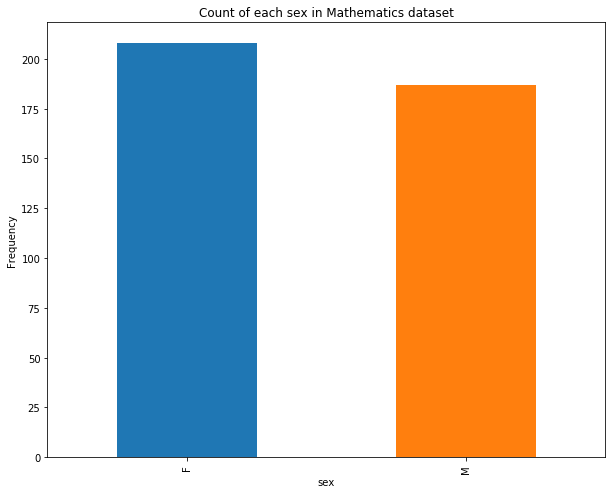

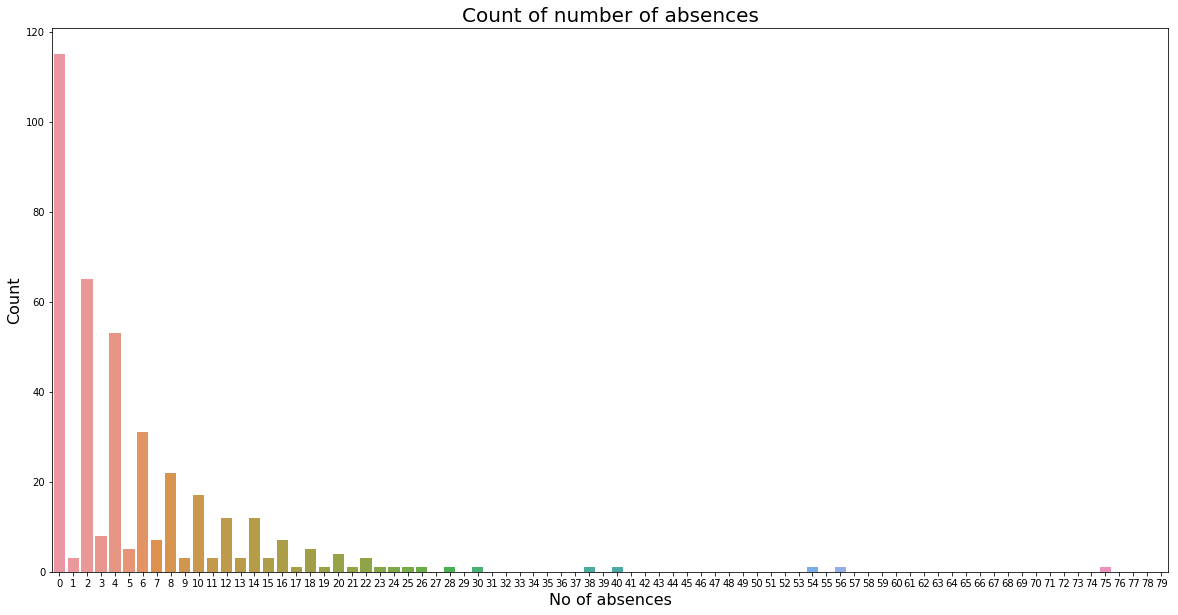

In [2]:
#mat = pd.read_csv('student-mat.csv', sep = ';')
#print(mat.head(10))
#print(mat.shape)



#Read in file
matdf = spark.read.csv('student-mat.csv',sep = ';', header=True,inferSchema=True)

#Here's the first row of the data.
print(matdf.head())

#And the entire data structure. 
matdf.printSchema()

#Data description
matdf.describe().toPandas().transpose()

#use Pandas to draw graphs
mat = pd.read_csv('student-mat.csv', sep = ';')

#Graph of count of sex for mathematics dataset
ax = mat.groupby(['sex'])['sex'].count().plot.bar(title="Count of each sex in Mathematics dataset", figsize=(10,8))
_ = ax.set_xlabel('sex')
_ = ax.set_ylabel('Frequency')

#Graph of count of absences for mathematics dataset
plt.figure(figsize=(20,10))
sns.countplot( x = 'absences', data=mat, order=list(range(0, 80)))
plt.title('Count of number of absences',fontsize=20)
plt.xlabel('No of absences', fontsize=16)
plt.ylabel('Count', fontsize=16)

Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=4, G1=0, G2=11, G3=11)
root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup:

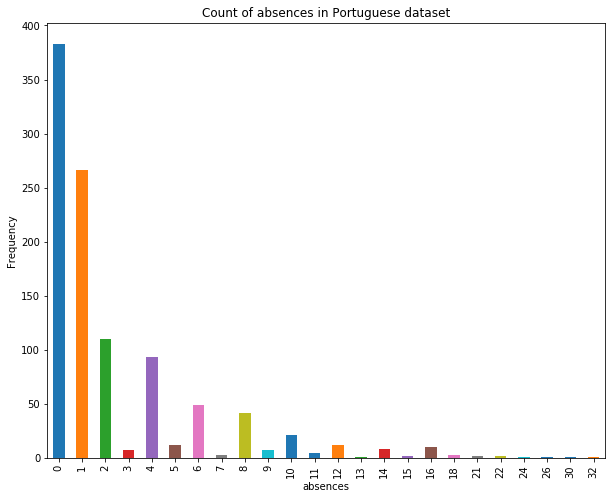

In [3]:
#read in Portugeuse Dataset
portdf = spark.read.csv('student-por.csv',sep = ';', header=True,inferSchema=True)

#Here's the first row of the data.
print(portdf.head())

#And the entire data structure. 
portdf.printSchema()

#Data description
portdf.describe().toPandas().transpose()

#use Pandas to draw graphs
port = pd.read_csv('student-por.csv', sep = ';')

#Graph of count of sex for portuguese dataset
ax = port.groupby(['sex'])['sex'].count().plot.bar(title="Count of each sex in Portuguese dataset", figsize=(10,8))
_ = ax.set_xlabel('sex')
_ = ax.set_ylabel('Frequency')


#Graph of count of absences for portuguese dataset
ax = port.groupby(['absences'])['absences'].count().plot.bar(title="Count of absences in Portuguese dataset", figsize=(10,8))
_ = ax.set_xlabel('absences')
_ = ax.set_ylabel('Frequency')

In [4]:
#merge two datasets together
mergedspark = matdf.union(portdf)

#Here's the first row of the data.
print(mergedspark.head())

mergedspark.describe()
print("Total rows:", mergedspark.count())

#And the entire data structure. 
mergedspark.printSchema()

#Data description
mergedspark.describe().toPandas().transpose()

Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, G3=6)
Total rows: 1044
root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)


,0,1,2,3,4
summary,count,mean,stddev,min,max
school,1044,None,None,GP,MS
sex,1044,None,None,F,M
age,1044,16.726053639846743,1.2399746931649513,15,22
address,1044,None,None,R,U
famsize,1044,None,None,GT3,LE3
Pstatus,1044,None,None,A,T
Medu,1044,2.603448275862069,1.1249065525083493,0,4
Fedu,1044,2.3879310344827585,1.0999380837775732,0,4
Mjob,1044,None,None,at_home,teacher


In [5]:
#create new column which shows 'Pass' or 'Fail' for the G3 grade
from pyspark.sql.functions import udf

def passorfail(G3):
    if G3 >= 10:
        return 'Pass'
    else:
        return 'Fail'

check = udf(passorfail)
mergedspark_new = mergedspark.withColumn("Results",check("G3"))
mergedspark_new.show(n=10)

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|Results|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6| 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Results       0
dtype: int64
1044
1039
1039
1024
1024
1023
1023
1003
34


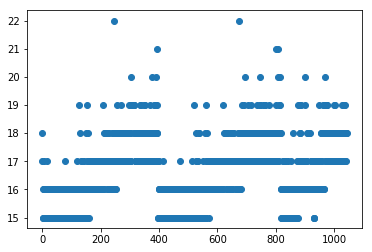

In [6]:
mergedpd = mergedspark_new.toPandas() 
y = mergedpd['age']
x = range(0,len(mergedpd))
plt.scatter(x,y)
mergedpd[mergedpd['age']== 0]

''''b = mergedpd['absences']
a = range(0,len(mergedpd))
plt.scatter(a,b)
mergedpd[mergedpd['absences']== 0]

d = mergedpd['G1']
c = range(0,len(mergedpd))
plt.scatter(c,d)
mergedpd[mergedpd['G1']== 0]

f = mergedpd['G2']
e = range(0,len(mergedpd))
plt.scatter(e,f)
mergedpd[mergedpd['G2']== 0]'''



#https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/

#Check for missing values
print(mergedpd.isnull().sum())

#Check for outliers within age. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
import numpy as np
from scipy import stats
mergedpd['age z score'] = np.abs(stats.zscore(mergedpd['age']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['age z score'] < 3]
print(len(mergedpd))

#Check for outliers within absences. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['absences z score'] = np.abs(stats.zscore(mergedpd['absences']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['absences z score'] < 3]
print(len(mergedpd))


#Check for outliers within G1. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['G1 z score'] = np.abs(stats.zscore(mergedpd['G1']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['G1 z score'] < 3]
print(len(mergedpd))

#Check for outliers within G2. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['G2 z score'] = np.abs(stats.zscore(mergedpd['G2']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['G2 z score'] < 3]
print(len(mergedpd))

mergedpd = mergedpd.drop('age z score', axis = 1)
mergedpd = mergedpd.drop('absences z score', axis = 1)
mergedpd = mergedpd.drop('G1 z score', axis = 1)
mergedpd = mergedpd.drop('G2 z score', axis = 1)
print(mergedpd.columns.size)

#plt.figure(figsize=(20,10))
#sns.countplot( x = 'absences', data=mergedpd, order=list(range(0, 25)))
#plt.title('Count of number of absences',fontsize=20)
#plt.xlabel('No of absences', fontsize=16)
#plt.ylabel('Count', fontsize=16)

In [7]:
#Convert categorical variables to one hot encoding, keep numerical vars as is
mergedpd = pd.get_dummies(mergedpd)
#mergedpd.info()


#Binary categorical variables can be encoding using only 1 var, so let's delete the other var
redundant_vars = [
    'school_MS',
    'sex_M',
    'address_U',
    'famsize_LE3',
    'Pstatus_T',
    'schoolsup_no',
    'famsup_no',
    'paid_no',
    'activities_no',
    'nursery_no',
    'higher_no',
    'internet_no',
    'romantic_no',
    'Results_Fail'
]

mergedpd.drop(redundant_vars, axis=1, inplace=True)
mergedpd.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Results_Pass
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,1,0,1,1,0,0,1


In [8]:
#Correlations for results
corr = mergedpd.corr()
corr_G3 = mergedpd.corr()['G3']
corr_G3.sort_values()

failures            -0.374855
Dalc                -0.137132
Walc                -0.135763
address_R           -0.114064
age                 -0.113185
schoolsup_yes       -0.109435
Mjob_at_home        -0.095788
traveltime          -0.090403
goout               -0.090212
absences            -0.086641
Mjob_other          -0.084824
paid_yes            -0.076146
health              -0.072765
guardian_other      -0.069952
reason_course       -0.063103
romantic_yes        -0.059847
reason_other        -0.053433
Fjob_services       -0.051138
famsize_GT3         -0.046953
freetime            -0.045645
Fjob_other          -0.021760
reason_home         -0.002988
famsup_yes          -0.000364
Fjob_at_home         0.003043
guardian_mother      0.015977
guardian_father      0.022814
sex_F                0.025804
Fjob_health          0.032028
nursery_yes          0.032836
activities_yes       0.042961
Pstatus_A            0.045944
Mjob_services        0.056128
famrel               0.076247
internet_y

In [9]:
# Feature Importance with Extra Trees Classifier

mergedpd_drop = mergedpd.drop('G3', axis = 1)
print(mergedpd_drop.head())
#mergedpd_features = mergedpd_drop.drop('Results_Pass', axis = 1)
print(mergedpd_drop.columns.size)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

array = mergedpd_drop.values


X = array[:,0:45]
Y = array[:,45]
# feature extraction
model = ExtraTreesClassifier(random_state=17)
clf = model.fit(X, Y)

print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
#feature_name = mergedpd_features.columns[feature_idx]

X_new = model.transform(X)
print(X_new.shape)
feature_idx = pd.DataFrame(feature_idx)

names = []
for i in range (0,mergedpd_drop.columns.size-1):
    name = (mergedpd_drop.columns[i])
    names.append(name)
names = pd.DataFrame(names)

importances = pd.concat([feature_idx, names], axis=1)

importances.columns = ('significant', 'feature')

print(importances)
importances[importances['significant'] == True]



   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc      ...       guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0     1      ...                    0              1           0         0   
1     1      ...                    0              0           1         0   
2     2      ...                    0              1           0         1   
3     1      ...                    0              0           1         1   
4     1      ...                    0              0           1         1   

   activities_yes  nursery_yes  higher_yes  intern

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,significant,feature
5,True,failures
12,True,absences
13,True,G1
14,True,G2


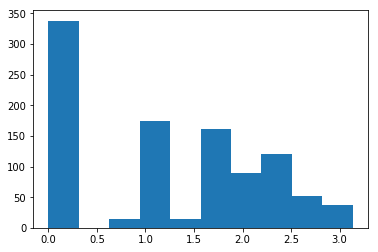

0.0
[1.94591015 1.60943791 2.39789527 ... 1.94591015 1.94591015 1.60943791]


In [10]:
#Graph of count of absences for mathematics dataset
plotdata = mergedpd_drop.groupby('absences').size()
#plotdata = plotdata.rename(columns = {plotdata.columns[1]:'count'})
plotdata.plot.bar(title="Count of absences in merged dataset", figsize=(10,8))
_ = ax.set_xlabel('absences')
_ = ax.set_ylabel('Frequency')
plt.close()

#absences data still looks right skewed even after taking out outliers.  will do a lognormal transformation on this data

# box-cox transform

# seed the random number generator
#seed(1)


# power transform
data = boxcox((mergedpd_drop['absences']+1), 0)
# histogram
pyplot.hist(data)
pyplot.show()

print(min(data))

print(data)

In [11]:
normalized_mergedpd=(mergedpd_drop-mergedpd_drop.min())/(mergedpd_drop.max()-mergedpd_drop.min())
print(normalized_mergedpd)

      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     0.6  1.00  1.00    0.333333   0.333333  0.000000    0.75      0.50   
1     0.4  0.25  0.25    0.000000   0.333333  0.000000    1.00      0.50   
2     0.0  0.25  0.25    0.000000   0.333333  1.000000    0.75      0.50   
3     0.0  1.00  0.50    0.000000   0.666667  0.000000    0.50      0.25   
4     0.2  0.75  0.75    0.000000   0.333333  0.000000    0.75      0.50   
5     0.2  1.00  0.75    0.000000   0.333333  0.000000    1.00      0.75   
6     0.2  0.50  0.50    0.000000   0.333333  0.000000    0.75      0.75   
7     0.4  1.00  1.00    0.333333   0.333333  0.000000    0.75      0.00   
8     0.0  0.75  0.50    0.000000   0.333333  0.000000    0.75      0.25   
9     0.0  0.75  1.00    0.000000   0.333333  0.000000    1.00      1.00   
10    0.0  1.00  1.00    0.000000   0.333333  0.000000    0.50      0.50   
11    0.0  0.50  0.25    0.666667   0.666667  0.000000    1.00      0.25   
12    0.0  1

In [12]:
corr = normalized_mergedpd.corr()
corr_G3 = normalized_mergedpd.corr()['Results_Pass']
corr_G3.sort_values()


# see correlation between variables through a correlation heatmap
#plt.figure(figsize=(30,30))
#sns.heatmap(corr, annot=True, cmap="Reds")
#plt.title('Correlation Heatmap', fontsize=20)

failures            -0.354889
age                 -0.117902
absences            -0.109804
goout               -0.098988
paid_yes            -0.079225
Dalc                -0.078350
Walc                -0.077604
reason_course       -0.072450
address_R           -0.072097
guardian_other      -0.064463
schoolsup_yes       -0.054604
freetime            -0.047253
Fjob_services       -0.045918
Mjob_other          -0.045325
Mjob_at_home        -0.041945
romantic_yes        -0.040809
health              -0.036024
famsize_GT3         -0.032452
nursery_yes         -0.026908
reason_other        -0.025866
traveltime          -0.023347
famsup_yes          -0.018417
guardian_mother     -0.013660
Fjob_health         -0.010927
Fjob_at_home         0.005435
sex_F                0.016624
activities_yes       0.023037
Fjob_other           0.023689
reason_home          0.026820
Mjob_health          0.029830
Mjob_teacher         0.039073
Mjob_services        0.040927
Fjob_teacher         0.041158
Pstatus_A 

In [13]:
#turn pandas DF into pyspark DF 
normalized_mergedpd2 = normalized_mergedpd[['failures', 'absences', 'G1', 'G2', 'Results_Pass']].copy()
normalized_merged = spark.createDataFrame(normalized_mergedpd)
normalized_merged2 = spark.createDataFrame(normalized_mergedpd2)


In [14]:
'''# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is new column name. 
vector_assembler = VectorAssembler(inputCols = ['G1', 'G2', 'failures'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(normalized_merged)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)



'''



#Convert the data frame to a dense vector
RANDOM_SEED = 13579
TRAINING_DATA_RATIO = 0.7
RF_NUM_TREES = 3
RF_MAX_DEPTH = 4
RF_MAX_BINS = 32

from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint

transformed_df = normalized_merged2.rdd.map(lambda row: LabeledPoint(row[-1], Vectors.dense(row[0:-1])))

splits = [TRAINING_DATA_RATIO, 1.0 - TRAINING_DATA_RATIO]
training_data, test_data = transformed_df.randomSplit(splits, RANDOM_SEED)

print("Number of training set rows: %d" % training_data.count())
print("Number of test set rows: %d" % test_data.count())

#transformed_df.collect()

Number of training set rows: 673
Number of test set rows: 330


In [15]:
#Train the random forest
#A random forest is a machine learning classification algorithm. Random forests are generated collections of decision trees. We’re also going to track the time it takes to train our model.
from pyspark.mllib.tree import RandomForest
from time import *

start_time = time()

modelRF = RandomForest.trainClassifier(training_data, numClasses=2, categoricalFeaturesInfo={}, \
    numTrees=RF_NUM_TREES, featureSubsetStrategy="auto", impurity="gini", \
    maxDepth=RF_MAX_DEPTH, maxBins=RF_MAX_BINS, seed=RANDOM_SEED)

end_time = time()
elapsed_time = end_time - start_time

print(modelRF)
print("Time to train model: %.3f seconds" % elapsed_time)

TreeEnsembleModel classifier with 3 trees

Time to train model: 1.982 seconds


In [16]:
#Make predictions and compute accuracy
#Once we’ve trained our random forest model, we need to make predictions and test the accuracy of the model. Fortunately, there is a handy predict() function available. The accuracy is defined as the total number of correct predictions divided by the total number of predictions

predictions = modelRF.predict(test_data.map(lambda x: x.features))
labels_and_predictions = test_data.map(lambda x: x.label).zip(predictions)
acc = labels_and_predictions.filter(lambda x: x[0] == x[1]).count() / float(test_data.count())
print("Model accuracy: %.3f%%" % (acc * 100))

Model accuracy: 91.212%


In [17]:
#model evaluation
from pyspark.mllib.evaluation import BinaryClassificationMetrics

start_time = time()

metrics = BinaryClassificationMetrics(labels_and_predictions)
print("Area under Precision/Recall (PR) curve: %.f" % (metrics.areaUnderPR * 100))
print("Area under Receiver Operating Characteristic (ROC) curve: %.3f" % (metrics.areaUnderROC * 100))

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate model: %.3f seconds" % elapsed_time)

Area under Precision/Recall (PR) curve: 98
Area under Receiver Operating Characteristic (ROC) curve: 89.921
Time to evaluate model: 0.681 seconds


In [18]:
#Train using decision tree

from pyspark.mllib.tree import DecisionTree
from time import *

start_time = time()

modelDT = DecisionTree.trainClassifier(training_data, numClasses=2, categoricalFeaturesInfo={}, \
                                       impurity="gini", \
                                       maxDepth=RF_MAX_DEPTH, maxBins=RF_MAX_BINS, minInstancesPerNode =1, 
                        minInfoGain =0.0)

#("trainDecisionTreeModel", data, type, numClasses, features, 
    #impurity, maxDepth, maxBins, minInstancesPerNode, minInfoGain)

end_time = time()
elapsed_time = end_time - start_time
print(modelDT)
print("Time to train model: %.3f seconds" % elapsed_time)
#print(modelDT.toDebugString())


DecisionTreeModel classifier of depth 4 with 29 nodes
Time to train model: 0.721 seconds


In [19]:
#Make predictions and compute accuracy
#Once we’ve trained our decision tree model, we need to make predictions and test the accuracy of the model. Fortunately, there is a handy predict() function available. The accuracy is defined as the total number of correct predictions divided by the total number of predictions

predictions = modelDT.predict(test_data.map(lambda x: x.features))
labels_and_predictions = test_data.map(lambda x: x.label).zip(predictions)
acc = labels_and_predictions.filter(lambda x: x[0] == x[1]).count() / float(test_data.count())
print("Model accuracy: %.3f%%" % (acc * 100))

Model accuracy: 91.515%


In [20]:
#model evaluation
from pyspark.mllib.evaluation import BinaryClassificationMetrics

start_time = time()

metrics = BinaryClassificationMetrics(labels_and_predictions)
print("Area under Precision/Recall (PR) curve: %.f" % (metrics.areaUnderPR * 100))
print("Area under Receiver Operating Characteristic (ROC) curve: %.3f" % (metrics.areaUnderROC * 100))

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate model: %.3f seconds" % elapsed_time)

Area under Precision/Recall (PR) curve: 98
Area under Receiver Operating Characteristic (ROC) curve: 90.708
Time to evaluate model: 0.563 seconds
